In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [4]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [5]:
## simple moving average

<AxesSubplot:xlabel='Date'>

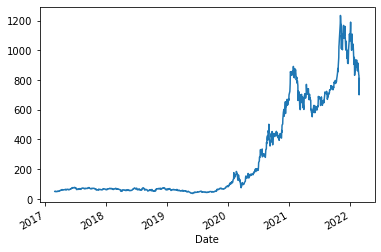

In [6]:
df_tesla['Open'].plot()

<AxesSubplot:xlabel='Date'>

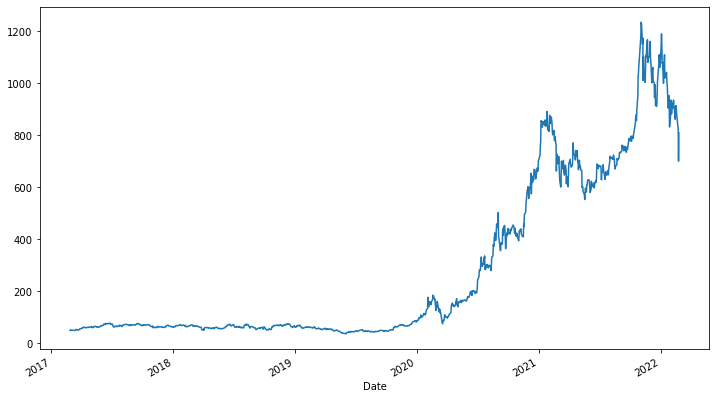

In [7]:
df_tesla['Open'].plot(figsize=(12,7))

In [9]:
## rolling means window size
##in last we should use mean beacuse to aggreate the value
df_tesla["Open:10 days rolling"]=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

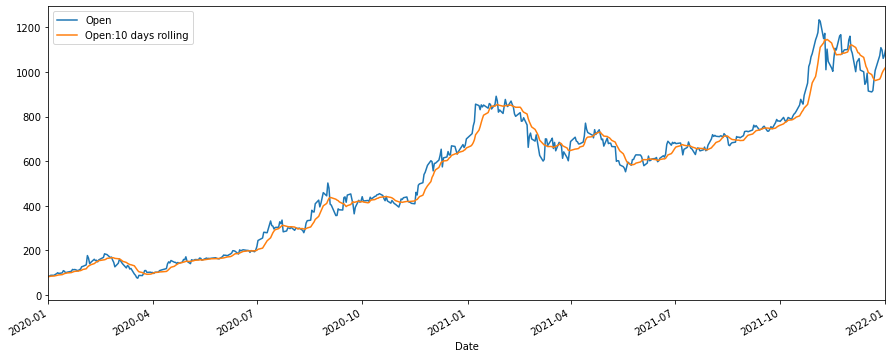

In [11]:
df_tesla[['Open',"Open:10 days rolling"]].plot(xlim=['2020-01-01','2022-01-01'],figsize=(15,6))

In [13]:
df_tesla["Open:30 days rolling"]=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla["Open:50 days rolling"]=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

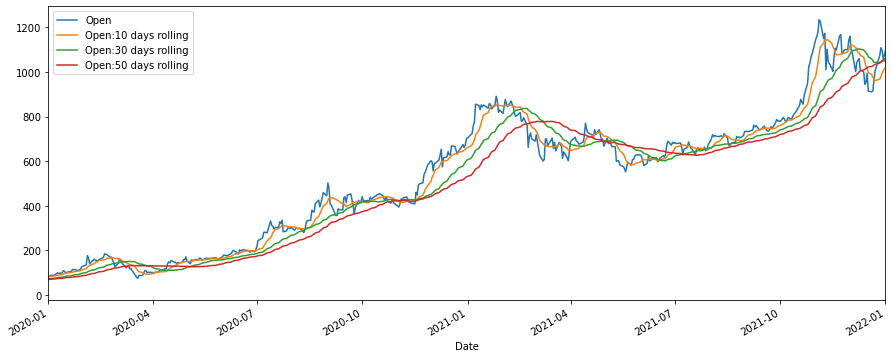

In [14]:
df_tesla[['Open',"Open:10 days rolling","Open:30 days rolling","Open:50 days rolling"]].plot(xlim=['2020-01-01','2022-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

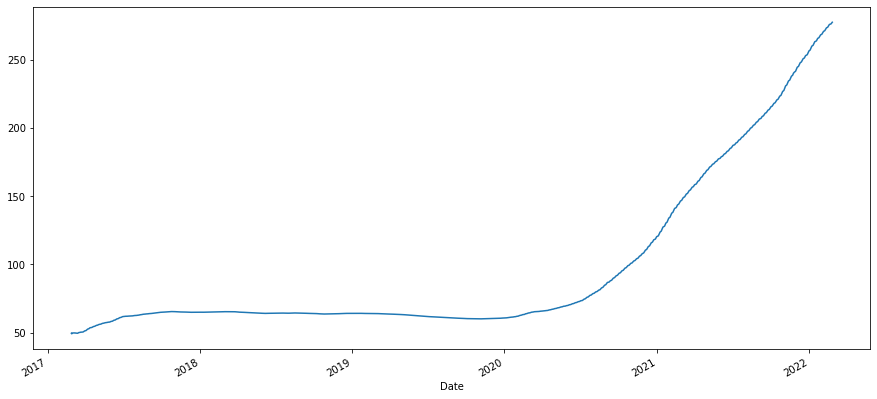

In [15]:
## Expanding
#cumilative moving average(CMA)
df_tesla['Open'].expanding().mean().plot(figsize=(15,7))

In [ ]:
##EWMA exponetional weighted moving average

In [18]:
##lets smothing factor -0.1
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

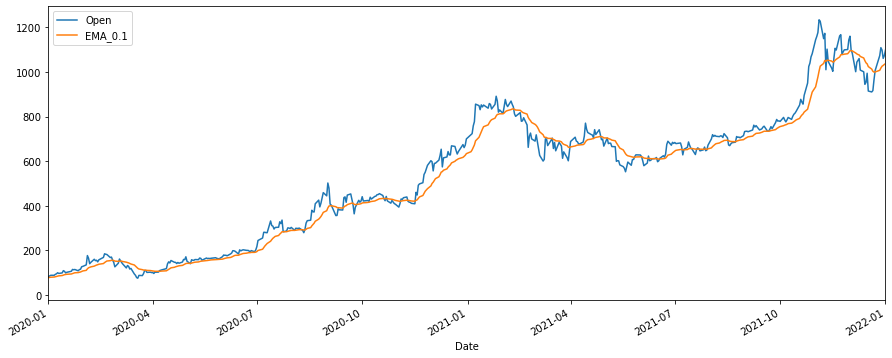

In [19]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2022-01-01'],figsize=(15,6))

In [22]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.2,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

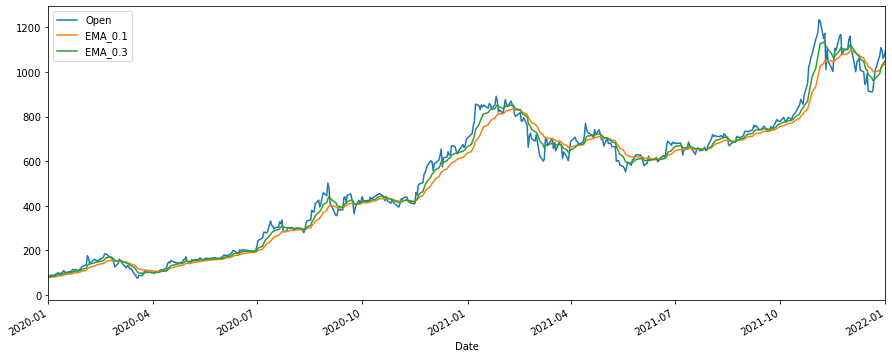

In [23]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2022-01-01'],figsize=(15,6))

In [25]:
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

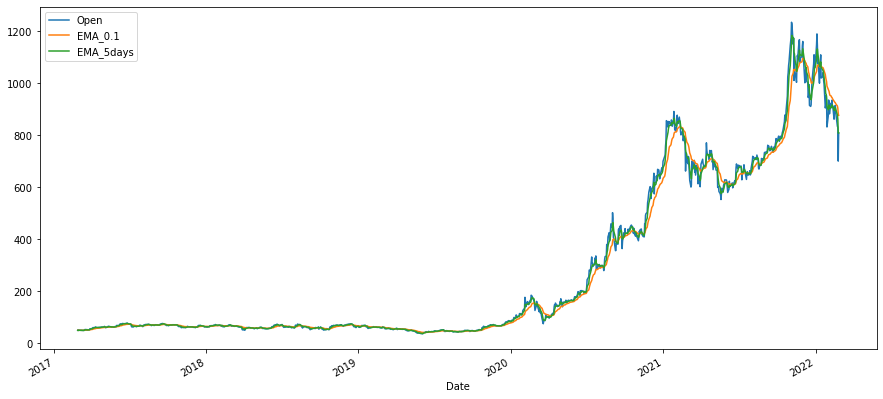

In [27]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(figsize=(15,7))